In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [15]:
img = cv2.imread('samples/rain_140_1.png')

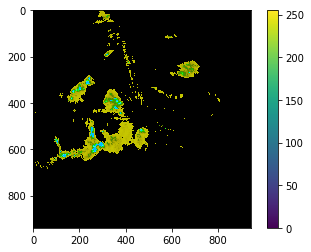

In [16]:
plt.imshow(img)
plt.colorbar()
plt.show()

In [17]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
res = cv2.drawContours(img, contours, -1, (0,255,0), 3)

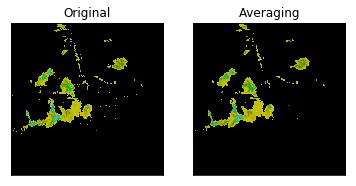

In [57]:
median = cv2.medianBlur(img,7)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

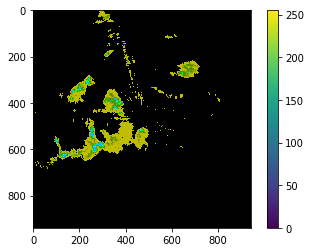

In [38]:
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 20
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)
plt.colorbar()
plt.show()